# Label Visualization

This notebook takes care of generating the figures used in our paper.

In [1]:
import seaborn as sns
import pandas as pd
import pickle

sns.set_theme("paper")
# sns.set_palette(sns.color_palette("flare"))

In [2]:
models = ["Llama-2-7b-chat-hf", "falcon-7b-instruct", "Mistral-7B-Instruct-v0.2", "Orca-2-7b"]
shot = "0"

In [3]:
responses = {model: pickle.load(open(f"./quantitative/{model}_responses_bool_{shot}.pk", "rb")) for model in models}

In [4]:
true_dist = {'A': 7167, 'B': 5669}
# true_dist = {'E': 2511, 'C': 2638, 'B': 2466, 'A': 2063, 'D': 2108, 'F': 1050}
# true_dist = None

In [5]:
df = {"labels":[], "model":[]}
for model in responses:
    for key, val in responses[model].items():
        df['labels'].extend([key]*len(val)) 
        df['model'].extend([model]*len(val))

if true_dist:
    for key in true_dist:
        df['labels'].extend([key]*true_dist[key])
    df['model'].extend(["True Distribution"] * sum(true_dist.values()))
df = pd.DataFrame.from_dict(df)

In [6]:
# accepted = ['A', 'B', 'C', 'D', 'E','F']
accepted = ['A', 'B']

In [7]:
filtered = df.copy()
filtered['labels'] = filtered['labels'].map(lambda val: val if val in accepted else "UNK")

In [8]:
filtered.head()

,labels,model
0,B,Llama-2-7b-chat-hf
1,B,Llama-2-7b-chat-hf
2,B,Llama-2-7b-chat-hf
3,B,Llama-2-7b-chat-hf
4,B,Llama-2-7b-chat-hf


Text(0.5, 1.0, '0-shot Deterministic Binary Responses on LIAR')

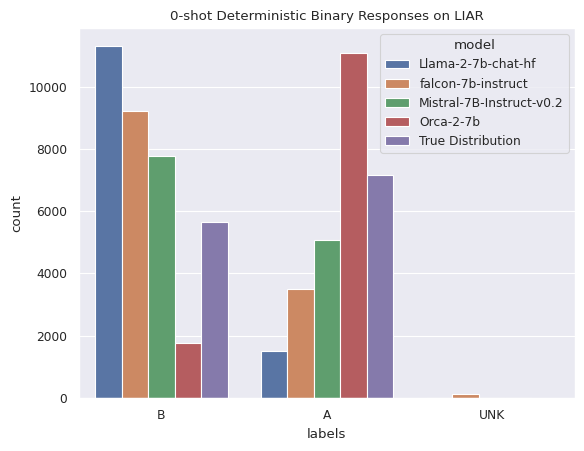

In [14]:
sns.countplot(filtered, x='labels', hue='model').set_title(f"{shot}-shot Deterministic Binary Responses on LIAR")

## View accuracies as well

In [10]:
accuracies = {model: [] for model in models}
for s in [0, 1, 5]:
    file = open(f"./quantitative/{s}_shot_full.txt").read()
    lines = file.splitlines()
    for line in lines:
        model_name = line[line.index("/")+1 : line.index(":")].strip()
        correct= int(line[line.index(":")+1 : line.rindex("/")])
        total = int(line[line.rindex("/")+1:])
        accuracies[model_name].append(correct / total)

In [11]:
accuracies

{'Llama-2-7b-chat-hf': [0.20426924275475225,
  0.14460459680560966,
  0.11978801340503469],
 'falcon-7b-instruct': [0.1943751947647242,
  0.16042072458122322,
  0.19211285168731979],
 'Mistral-7B-Instruct-v0.2': [0.22460267996260516,
  0.24830541488118427,
  0.23606889564336372],
 'Orca-2-7b': [0.17723589903396697, 0.21340085703155434, 0.13849271296079807]}

In [12]:
averaged = [0 for _ in range(3)]
for i in range(3):
    for model in accuracies:
        averaged[i] += accuracies[model][i]
    averaged[i] /= len(accuracies)
averaged

[0.20012075412901215, 0.19168289832489288, 0.1716156184241291]

<Axes: >

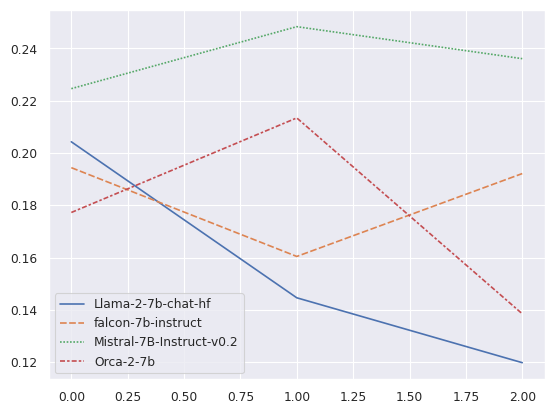

In [13]:
sns.lineplot(accuracies)